* K-Means

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Ganti dengan nama file kamu jika perlu
df = pd.read_csv("data_mobil_1000.csv")
df.head()


,Merek,Harga (Juta Rp),Tenaga Kuda (HP),Efisiensi BBM (km/l)
0,Chevrolet,434.713961,131.269720,12.686712
1,Mercedes,864.322715,231.920566,11.562219
2,Audi,806.080678,235.138323,10.502607
3,Hyundai,288.321354,91.475834,15.350966
4,Chevrolet,421.510638,122.825770,16.095747


In [31]:
# Cek missing values
print(df.isnull().sum())

# Drop kolom yang tidak diperlukan (opsional)
# df = df.drop(['Kolom1', 'Kolom2'], axis=1)

# Encoding jika ada kolom kategori
# df['kategori'] = df['kategori'].astype('category').cat.codes

# Normalisasi data numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

df_scaled[:5]


Merek                   0
Harga (Juta Rp)         0
Tenaga Kuda (HP)        0
Efisiensi BBM (km/l)    0
dtype: int64


array([[-0.42625297, -0.6487169 , -0.25212164],
       [ 1.21841883,  0.82168933, -0.57310254],
       [ 0.99545076,  0.86869748, -0.87556328],
       [-0.98668799, -1.230065  ,  0.50837597],
       [-0.47679927, -0.7720744 ,  0.72096972]])

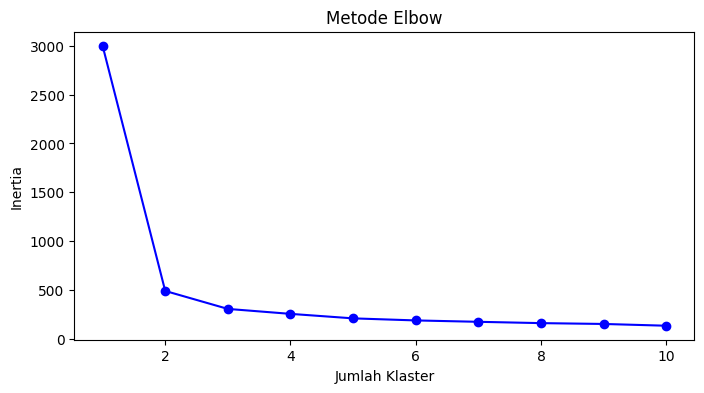

In [32]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()


In [33]:
# Misalnya kita pilih 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Lihat hasil clustering
df['cluster'].value_counts()


cluster
1    411
2    363
0    226
Name: count, dtype: int64

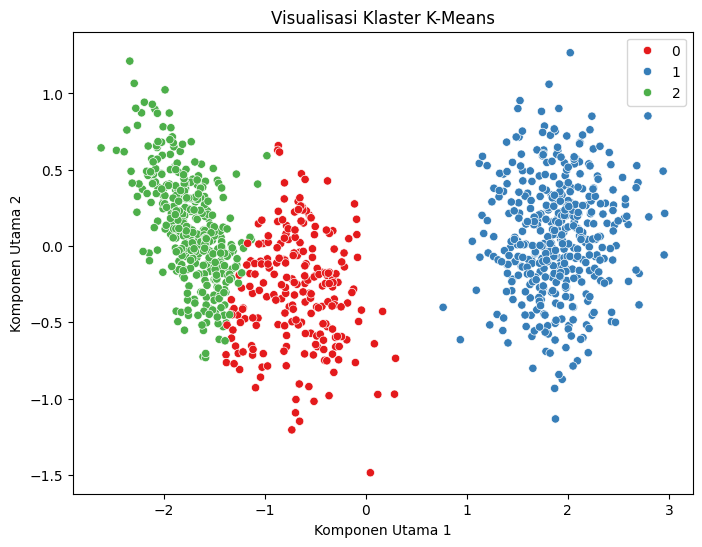

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['cluster'], palette='Set1')
plt.title('Visualisasi Klaster K-Means')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()


*  DAFTAR MOBIL TERMURAH SAMPAI MAHAL DLL

In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv("data_mobil_1000.csv")
df.head()


,Merek,Harga (Juta Rp),Tenaga Kuda (HP),Efisiensi BBM (km/l)
0,Chevrolet,434.713961,131.269720,12.686712
1,Mercedes,864.322715,231.920566,11.562219
2,Audi,806.080678,235.138323,10.502607
3,Hyundai,288.321354,91.475834,15.350966
4,Chevrolet,421.510638,122.825770,16.095747


In [38]:
df['Merek'].unique()

array(['Chevrolet', 'Mercedes', 'Audi', 'Hyundai', 'Lexus', 'BMW', 'Ford',
       'Honda', 'Toyota', 'Kia'], dtype=object)

In [39]:
def to_rupiah(juta):
    return f"Rp{juta * 1_000_000:,.0f}".replace(",", ".")

df_sorted_harga = df.sort_values(by='Harga (Juta Rp)', ascending=True).copy()
df_sorted_harga['Harga (Rp)'] = df_sorted_harga['Harga (Juta Rp)'].apply(to_rupiah)

df_sorted_harga[['Merek', 'Harga (Juta Rp)', 'Harga (Rp)']].head(10)


,Merek,Harga (Juta Rp),Harga (Rp)
877,Hyundai,204.365656,Rp204.365.656
532,Hyundai,212.954290,Rp212.954.290
390,Kia,224.477007,Rp224.477.007
165,Toyota,226.346249,Rp226.346.249
222,Kia,229.932818,Rp229.932.818
149,Kia,230.259622,Rp230.259.622
231,Toyota,231.180710,Rp231.180.710
955,Toyota,231.308534,Rp231.308.534
558,Kia,232.779786,Rp232.779.786
181,Hyundai,235.290581,Rp235.290.581


In [40]:
target_tenaga = 150
toleransi = 5

df_tenaga_sama = df[
    (df['Tenaga Kuda (HP)'] >= target_tenaga - toleransi) &
    (df['Tenaga Kuda (HP)'] <= target_tenaga + toleransi)
]

df_tenaga_sama_sorted = df_tenaga_sama.sort_values(by='Efisiensi BBM (km/l)', ascending=False)
df_tenaga_sama_sorted[['Merek', 'Tenaga Kuda (HP)', 'Efisiensi BBM (km/l)', 'Harga (Juta Rp)']].head()


,Merek,Tenaga Kuda (HP),Efisiensi BBM (km/l),Harga (Juta Rp)
330,Ford,154.196363,17.260608,457.541699
798,Chevrolet,154.513963,16.755012,378.667811
686,Ford,146.616976,16.019094,373.365864
691,Ford,147.580764,15.686938,282.841945
493,Chevrolet,154.632960,15.646764,386.557041


In [41]:
df['Efisiensi per Juta'] = df['Efisiensi BBM (km/l)'] / df['Harga (Juta Rp)']
df_optimal = df.sort_values(by='Efisiensi per Juta', ascending=False)

df_optimal[['Merek', 'Efisiensi BBM (km/l)', 'Harga (Juta Rp)', 'Efisiensi per Juta']].head(10)


,Merek,Efisiensi BBM (km/l),Harga (Juta Rp),Efisiensi per Juta
390,Kia,20.726701,224.477007,0.092333
955,Toyota,20.116516,231.308534,0.086968
181,Hyundai,20.369193,235.290581,0.086570
937,Toyota,21.126085,258.228314,0.081812
877,Hyundai,16.528005,204.365656,0.080875
231,Toyota,18.625377,231.180710,0.080566
165,Toyota,17.755144,226.346249,0.078442
885,Hyundai,18.585789,239.796639,0.077506
647,Kia,21.682845,279.795794,0.077495
665,Hyundai,19.258123,248.993708,0.077344


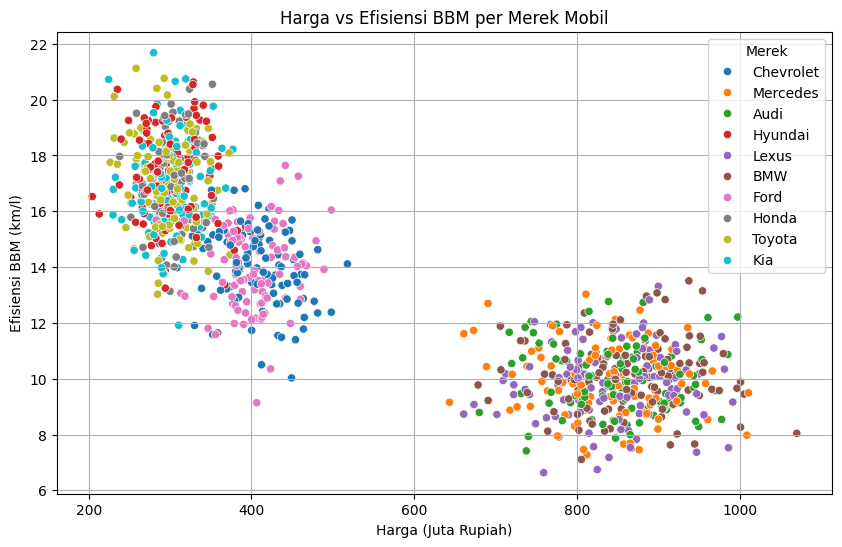

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Harga (Juta Rp)', y='Efisiensi BBM (km/l)', hue='Merek')
plt.title("Harga vs Efisiensi BBM per Merek Mobil")
plt.xlabel("Harga (Juta Rupiah)")
plt.ylabel("Efisiensi BBM (km/l)")
plt.grid(True)
plt.show()


## Distribusi Jumlah Mobil per Cluster (Hasil K-Means)

Berikut adalah hasil clustering K-Means berdasarkan **Harga**, **Tenaga Kuda (HP)**, dan **Efisiensi BBM (km/l)**:

| Cluster | Jumlah Mobil | Karakteristik                          |
|---------|---------------|----------------------------------------|
| 0       | 226 mobil     | ⚙️ **Sedang** – harga menengah, efisiensi sedang |
| 1       | 411 mobil     | 💸 **Mahal & Boros** – harga tinggi, tenaga besar, efisiensi rendah |
| 2       | 363 mobil     | 🟢 **Efisien & Murah** – harga rendah, tenaga sedang, efisiensi tinggi ✅ |

---

### 🧠 Kesimpulan:
- **Cluster 2** adalah kelompok **terbaik** untuk konsumen yang menginginkan mobil **hemat biaya dan efisien bahan bakar**.
- **Cluster 1** cocok untuk pengguna yang mengutamakan **performa tinggi**, namun siap dengan **biaya operasional lebih besar**.
- **Cluster 0** adalah kategori **menengah** yang seimbang antara harga, tenaga, dan efisiensi.

